In [34]:
import requests as rqsts
from bs4 import BeautifulSoup as BS
import nltk
from nltk.tokenize import RegexpTokenizer

In [35]:
#getting StopWords for english lang
file = open("english", "r")
sw=[]
for word in file:
    sw.append(word[:-1])
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [39]:
def word_freq_plot(url):
    """ plots frequency of words in html  """
    #make request
    r = rqsts.get(url)
    #extract HTML from response object
    html = r.text
    #create Beautifulsoup object
    soup = BS(html, "html5lib")
    #get words from soup
    words = soup.get_text()
    #create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    #create token
    token =  tokenizer.tokenize(words)
    #initialize empty list
    text = []
    #coverting alll in lower case
    for word in token:
        text.append(word.lower())
    #initialize empty list
    text_new = []
    #removing stopwords from text
    for word in text:
        if word not in sw:
            text_new.append(word)
    #ploting frequency
    freq = nltk.FreqDist(text_new)
    freq.plot(30)

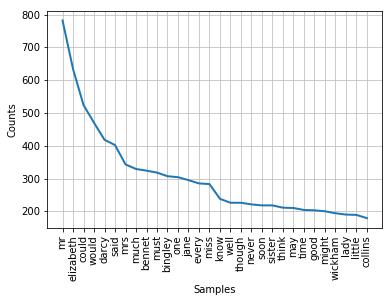

In [40]:
#plot for pride and prejudice
word_freq_plot('https://www.gutenberg.org/files/42671/42671-h/42671-h.htm')

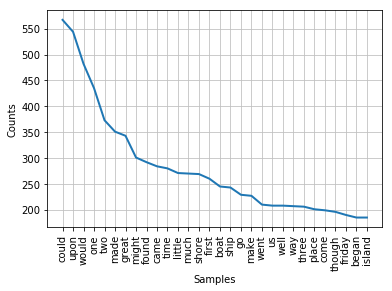

In [41]:
#plot for Robinson Crusoe
word_freq_plot('https://www.gutenberg.org/files/521/521-h/521-h.htm')